In [1]:
import keras
import tensorflow as tf
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from skimage import color
import os
   

In [15]:
def load_and_resize_images(folder, size, resize_factor):
   images = []
   small_images = []
   for filename in os.listdir(folder):
       img = Image.open(os.path.join(folder, filename))
       img = img.resize((size, size))
       images.append(np.array(img))
       
       new_size = int(size * resize_factor)
       small_image = img.resize((new_size, new_size))
       small_images.append(np.array(small_image))
   return np.array(images), np.array(small_images)

In [16]:
image_size = 256
test_img_large, test_img_small = load_and_resize_images('./data/test', image_size, .25)
train_img_large, train_img_small  = load_and_resize_images('./data/train', image_size, .25)

In [36]:
X_test = test_img_small/255
y_test = test_img_large/255
X_train = train_img_small/255
y_train = train_img_large/255

In [46]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1300, 64, 64, 3) (1300, 256, 256, 3)
(50, 64, 64, 3) (50, 256, 256, 3)


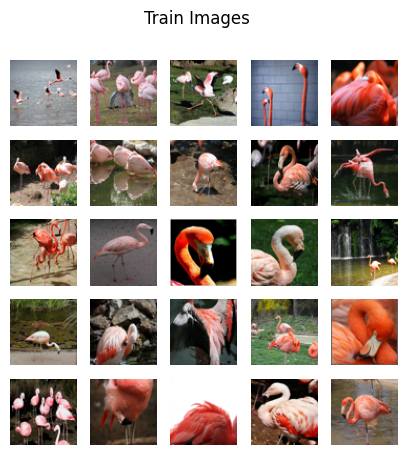

In [38]:
fig, axis = plt.subplots(5, 5, figsize=(5, 5))
axis = axis.ravel()

fig.suptitle('Train Images')

for i in range(25):
    axis[i].imshow(X_train[i])
    axis[i].axis('off')
    


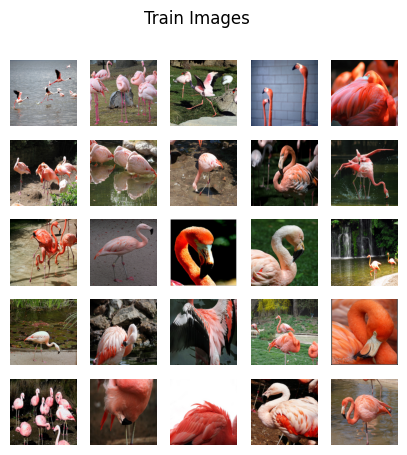

In [40]:
fig, axis = plt.subplots(5, 5, figsize=(5, 5))
axis = axis.ravel()

fig.suptitle('Train Images')

for i in range(25):
    axis[i].imshow(y_train[i])
    axis[i].axis('off')

Text(0.5, 1.0, 'Ground Truth Image')

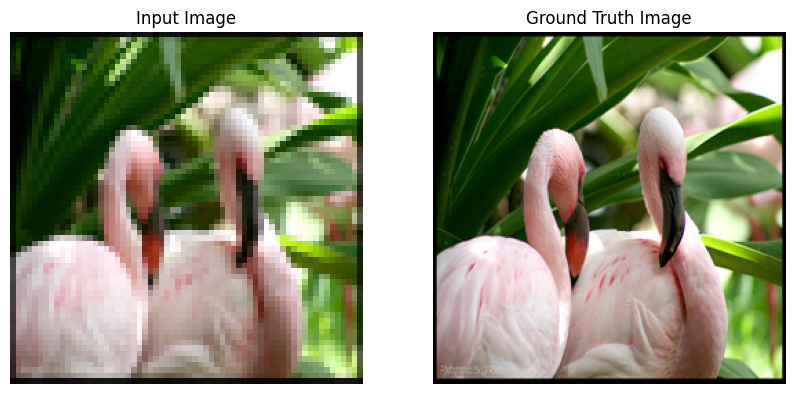

In [41]:
random_index = np.random.randint(0, len(X_train))
fig, axis = plt.subplots(1, 2, figsize=(10, 5))
axis[0].imshow(X_train[random_index])
axis[0].axis('off')
axis[0].set_title('Input Image')
axis[1].imshow(y_train[random_index])
axis[1].axis('off')
axis[1].set_title('Ground Truth Image')

In [42]:
img_shape = X_train.shape[1:]
print(img_shape)


(64, 64, 3)


In [43]:
autoencoder = tf.keras.Sequential()
autoencoder.add(tf.keras.Input(shape=img_shape))
#encoding
autoencoder.add(tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=img_shape))
autoencoder.add(tf.keras.layers.MaxPooling2D((2, 2), padding='same'))
autoencoder.add(tf.keras.layers.Dropout(0.25))  
autoencoder.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'))
autoencoder.add(tf.keras.layers.MaxPooling2D((2, 2), padding='same'))

#decoding
autoencoder.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'))
autoencoder.add(tf.keras.layers.UpSampling2D((4, 4)))  
autoencoder.add(tf.keras.layers.Dropout(0.25))
autoencoder.add(tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding='same'))
autoencoder.add(tf.keras.layers.UpSampling2D((4, 4)))  
autoencoder.add(tf.keras.layers.Conv2D(3, (3,3), activation='sigmoid', padding='same'))

autoencoder.compile(optimizer='adam', loss='mse')

In [51]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
autoencoder.fit(X_train, y_train , epochs=50, batch_size=10, shuffle=True, validation_data=(X_test, y_test))


(1300, 64, 64, 3) (1300, 256, 256, 3)
(50, 64, 64, 3) (50, 256, 256, 3)
Epoch 1/50
130/130 [==============================] - 13s 101ms/step - loss: 0.0134 - val_loss: 0.0138
Epoch 2/50
130/130 [==============================] - 14s 109ms/step - loss: 0.0126 - val_loss: 0.0112
Epoch 3/50
130/130 [==============================] - 14s 106ms/step - loss: 0.0122 - val_loss: 0.0109
Epoch 4/50
130/130 [==============================] - 13s 102ms/step - loss: 0.0118 - val_loss: 0.0115
Epoch 5/50
130/130 [==============================] - 14s 104ms/step - loss: 0.0116 - val_loss: 0.0106
Epoch 6/50
130/130 [==============================] - 13s 103ms/step - loss: 0.0114 - val_loss: 0.0103
Epoch 7/50
130/130 [==============================] - 13s 101ms/step - loss: 0.0112 - val_loss: 0.0106
Epoch 8/50
130/130 [==============================] - 13s 102ms/step - loss: 0.0110 - val_loss: 0.0101
Epoch 9/50
130/130 [==============================] - 14s 105ms/step - loss: 0.0109 - val_loss: 0.0098
E

1/1 [==============================] - 0s 15ms/step


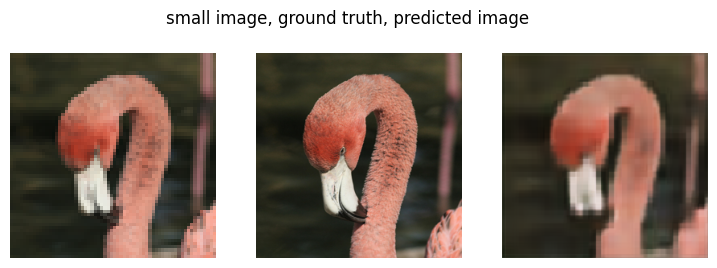

In [55]:
fig, axis = plt.subplots(1, 3, figsize=(9, 3))
axis = axis.ravel()

random_index = np.random.randint(0, len(X_test))


test_image = X_test[random_index]
predicted_image = autoencoder.predict(test_image.reshape(1, *test_image.shape))
large_image = y_test[random_index]


array = [test_image, large_image, predicted_image[0]]

fig.suptitle('small image, ground truth, predicted image')

for i in range(3):
    axis[i].axis('off')
    axis[i].imshow(array[i])

    